In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I'll be looking at a dataset of delayed flights for the year 2008.

In [5]:
all_delays = pd.read_csv('DelayedFlights.csv')

In [6]:
all_delays.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
delays = all_delays.loc[:, ['Month', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance']]

In [8]:
delays.count()

Month       1936758
AirTime     1928371
ArrDelay    1928371
DepDelay    1936758
Distance    1936758
dtype: int64

In [9]:
delays.isnull().sum()

Month          0
AirTime     8387
ArrDelay    8387
DepDelay       0
Distance       0
dtype: int64

In [10]:
delays = delays[~delays.isnull().any(axis=1)]

In [11]:
delays.count()

Month       1928371
AirTime     1928371
ArrDelay    1928371
DepDelay    1928371
Distance    1928371
dtype: int64

In [12]:
delays.isnull().sum()

Month       0
AirTime     0
ArrDelay    0
DepDelay    0
Distance    0
dtype: int64

In [13]:
stats = delays.describe()
stats

,Month,AirTime,ArrDelay,DepDelay,Distance
count,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06
mean,6.107855e+00,1.082771e+02,4.219988e+01,4.309169e+01,7.649486e+02
std,3.480753e+00,6.864261e+01,5.678472e+01,5.326600e+01,5.738858e+02
min,1.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01
25%,3.000000e+00,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02
50%,6.000000e+00,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02
75%,9.000000e+00,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02
max,1.200000e+01,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03


First explore the arrival delays feature.

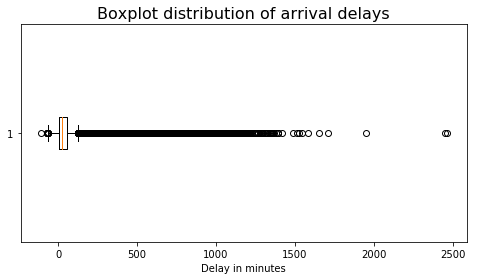

In [15]:
plt.rcParams["figure.figsize"] = [8.0, 4.0]
plt.boxplot(delays['ArrDelay'], vert=False)
plt.xlabel('Delay in minutes')
plt.title('Boxplot distribution of arrival delays', size=16)

Clearly this is an extremely skewed dataset, so to make the plots manageable, I'll remove outliers. From trying several values, it seems like 2.5 times the Interquartile Range keeps the maximum amount of data while still producing usable distribution plots.

In [16]:
numeric = delays.loc[:, ['AirTime', 'ArrDelay', 'DepDelay', 'Distance']]
n_stats = numeric.describe()
IQR = n_stats.loc['75%'] - n_stats.loc['25%']
Lower = n_stats.loc['25%'] - 2.5 * IQR
Upper = n_stats.loc['75%'] + 2.5 * IQR
Outliers = ((numeric < Lower) | (numeric > Upper)).sum().sum()
Outliers

166610

In [17]:
df = delays[~(((numeric < Lower) | (numeric > Upper)).any(1))]
df.describe()

,Month,AirTime,ArrDelay,DepDelay,Distance
count,1.826757e+06,1.826757e+06,1.826757e+06,1.826757e+06,1.826757e+06
mean,6.103836e+00,1.056111e+02,3.369523e+01,3.506096e+01,7.444481e+02
std,3.476323e+00,6.372370e+01,3.584420e+01,3.198920e+01,5.355352e+02
min,1.000000e+00,0.000000e+00,-7.000000e+01,6.000000e+00,1.100000e+01
25%,3.000000e+00,5.800000e+01,8.000000e+00,1.200000e+01,3.370000e+02
50%,6.000000e+00,8.900000e+01,2.300000e+01,2.300000e+01,6.020000e+02
75%,9.000000e+00,1.350000e+02,5.000000e+01,4.700000e+01,9.870000e+02
max,1.200000e+01,3.340000e+02,1.730000e+02,1.550000e+02,2.644000e+03


In [18]:
df.describe()

,Month,AirTime,ArrDelay,DepDelay,Distance
count,1.826757e+06,1.826757e+06,1.826757e+06,1.826757e+06,1.826757e+06
mean,6.103836e+00,1.056111e+02,3.369523e+01,3.506096e+01,7.444481e+02
std,3.476323e+00,6.372370e+01,3.584420e+01,3.198920e+01,5.355352e+02
min,1.000000e+00,0.000000e+00,-7.000000e+01,6.000000e+00,1.100000e+01
25%,3.000000e+00,5.800000e+01,8.000000e+00,1.200000e+01,3.370000e+02
50%,6.000000e+00,8.900000e+01,2.300000e+01,2.300000e+01,6.020000e+02
75%,9.000000e+00,1.350000e+02,5.000000e+01,4.700000e+01,9.870000e+02
max,1.200000e+01,3.340000e+02,1.730000e+02,1.550000e+02,2.644000e+03


In [19]:
ArrDelay_sorted = sorted(df['ArrDelay'].values)
normed = sorted(np.random.normal(33.695, 35.844, 1826757))

[<matplotlib.text.Text at 0x11eb4b860>, <matplotlib.text.Text at 0x11eb59208>]

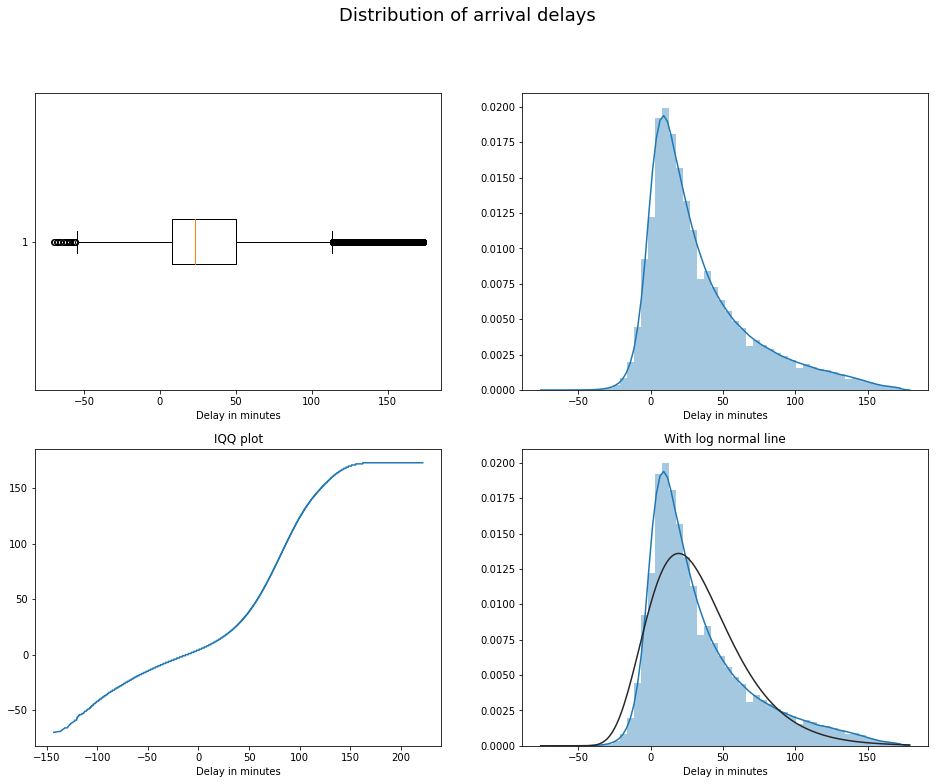

In [21]:
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = [16.0, 12.0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.suptitle('Distribution of arrival delays', size=18)
ax1.boxplot(df['ArrDelay'], vert=False)
ax1.set(xlabel='Delay in minutes')
sns.distplot(df['ArrDelay'], ax=ax2)
ax2.set(xlabel='Delay in minutes')
ax3.plot(normed, ArrDelay_sorted)
ax3.set(title='IQQ plot', xlabel='Delay in minutes')
sns.distplot(df['ArrDelay'], fit=stats.lognorm, ax=ax4)
ax4.set(title='With log normal line', xlabel='Delay in minutes')

The top two plots both show that the prepped dataset remains fairly heavily skewed. The kernel density curve shows this more visually, while the boxplot gives a better sense of the distribution of outliers. The IQQ plot confrims that the distribution is not normal, while the kernel density plot with the added log normal line shows that the distribution is much closer to log normal, which would be useful to know were one to perform a linear regression on this data.

For a bivariate comparison, look at the relationship between time in the air and arrival delays.

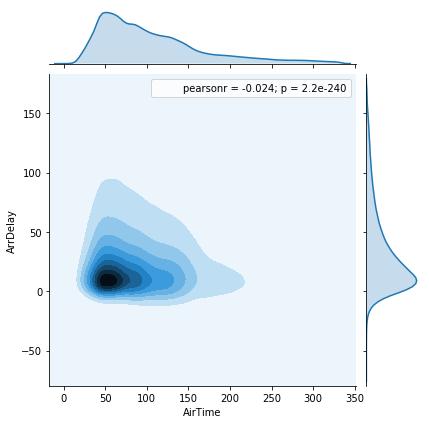

In [141]:
plt.rcParams["figure.figsize"] = [12.0, 12.0]
sns.jointplot(x='AirTime', y='ArrDelay', data=df, kind='kde')

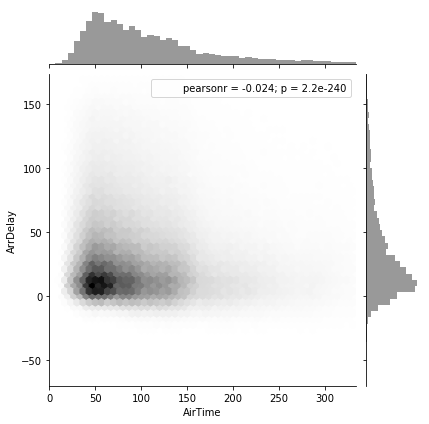

In [139]:
sns.jointplot(x='AirTime', y='ArrDelay', data=df, kind="hex", color="k")

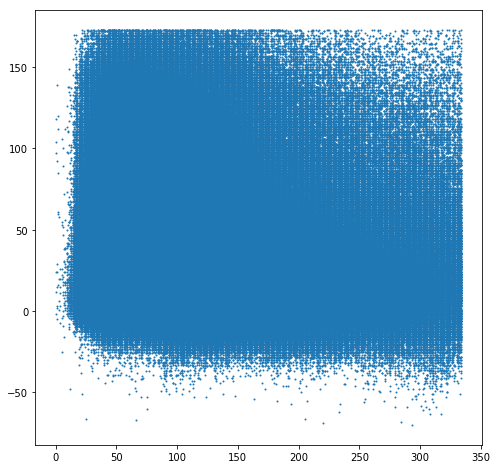

In [146]:
plt.rcParams["figure.figsize"] = [8.0, 8.0]
plt.scatter(x='AirTime', y='ArrDelay', data=df, s=1)

Of the three plots above, the joint kernal density plot most easily conveys the idea that the great majority of delays are short delays on short flights, but that beyond this there is no observable pattern, with short flights as prone to long delays as long flights are to have short delays. The hex plot also shows this, but not as clearly, while the scatter plot mostly illustrates the problem of trying to plot such a large dataset.   

The only categorical feature in the data is the month, so construct plots showing the relationship between this and other features. First, extract a new set of features, the number of delays per month in each of several , and use this also.

In [27]:
depDelays = df.loc[((df['DepDelay'] > 5) & (df['DepDelay'] <= 15)), ['Month', 'DepDelay']]
count = depDelays.groupby('Month').count()
count.columns = ['> 5']
count['> 15'] = df.loc[((df['DepDelay'] > 15) & (df['DepDelay'] <= 30)), ['Month', 'DepDelay']].groupby('Month').count()
count['> 30'] = df.loc[((df['DepDelay'] > 30) & (df['DepDelay'] <= 60)), ['Month', 'DepDelay']].groupby('Month').count()
count['> 60'] = df.loc[((df['DepDelay'] > 60) & (df['DepDelay'] <= 90)), ['Month', 'DepDelay']].groupby('Month').count()
count['> 90'] = df.loc[((df['DepDelay'] > 90) & (df['DepDelay'] <= 1120)), ['Month', 'DepDelay']].groupby('Month').count()
count['> 120'] = df.loc[df['DepDelay'] > 120, ['Month', 'DepDelay']].groupby('Month').count()

In [28]:
count

,> 5,> 15,> 30,> 60,> 90,> 120
Month,,,,,,
1,59510,44219,37654,16870,14695,5565
2,58925,44649,40235,18626,15947,5897
3,66359,48653,41012,18429,15479,5884
4,55812,37846,30965,13117,10116,3851
5,56245,37314,29672,12728,10169,3746
6,63017,45983,41836,20134,17132,6469
7,58606,41492,37416,17620,15330,6018
8,55987,37344,32701,15027,12087,4618
9,36623,22471,18213,8011,6521,2313


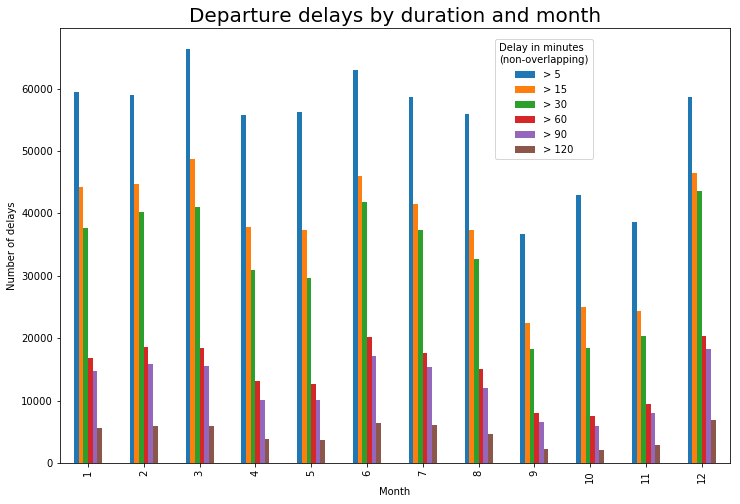

In [38]:
plt.rcParams["figure.figsize"] = [12.0, 8.0]
ax1 = count.plot(kind='bar')
ax1.legend(loc=(.65, .7), title='Delay in minutes\n(non-overlapping)')
plt.title('Departure delays by duration and month', size=20)
plt.ylabel('Number of delays')


The addition of the color-coded counts makes for a very informative presentation. For the most part, the number of delays in all duration categories, which do not overlap, rise and fall in step. Still, it can be seen that December has the highest percentage of long delays.

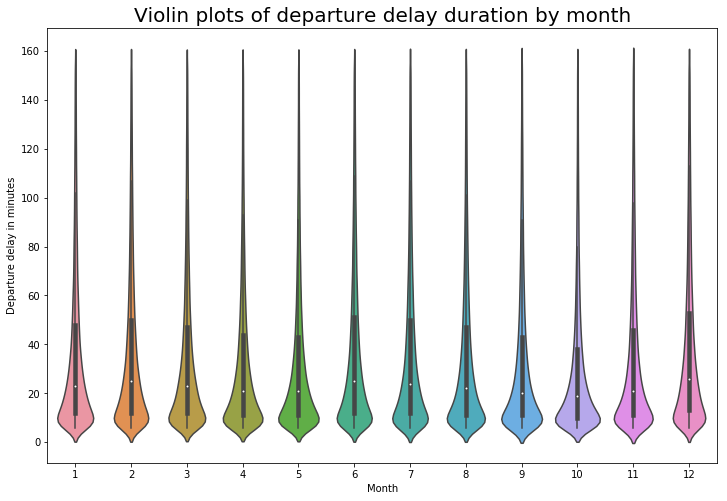

In [26]:
month = df['Month']
depDel = df['DepDelay']
sns.violinplot(x=month, y=depDel)
plt.title('Violin plots of departure delay duration by month', size=20)
plt.ylabel('Departure delay in minutes')

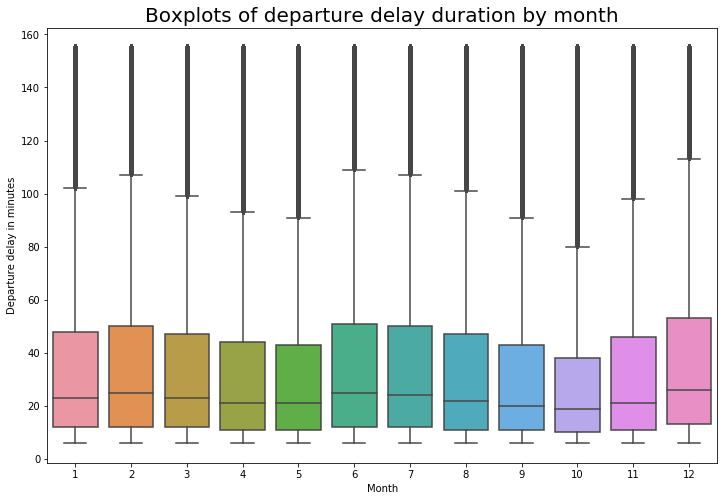

In [218]:
sns.boxplot(x=month, y=depDel)
plt.title('Boxplots of departure delay duration by month', size=20)
plt.ylabel('Departure delay in minutes')

Of the two plots above, I find the boxplots more informative than the violin plots, which are less effective due to the nearly uniformly long tails.

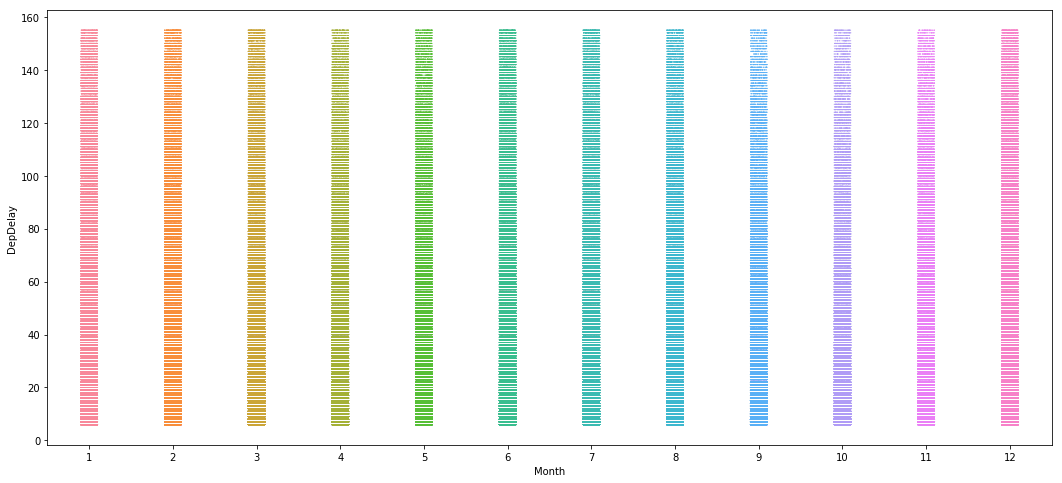

In [206]:
plt.rcParams["figure.figsize"] = [18.0, 8.0]
sns.stripplot(x=month, y=depDel, size=1, jitter=True)

This simple strip plot shows very little except, again, that plotting datasets this large is challenging. As a different approach, try randomly sampling the dataset. The next group of strip plots will use four samplings of 0.1 of the dataset, generated with different random seeds, to see if this gives a better picture. 

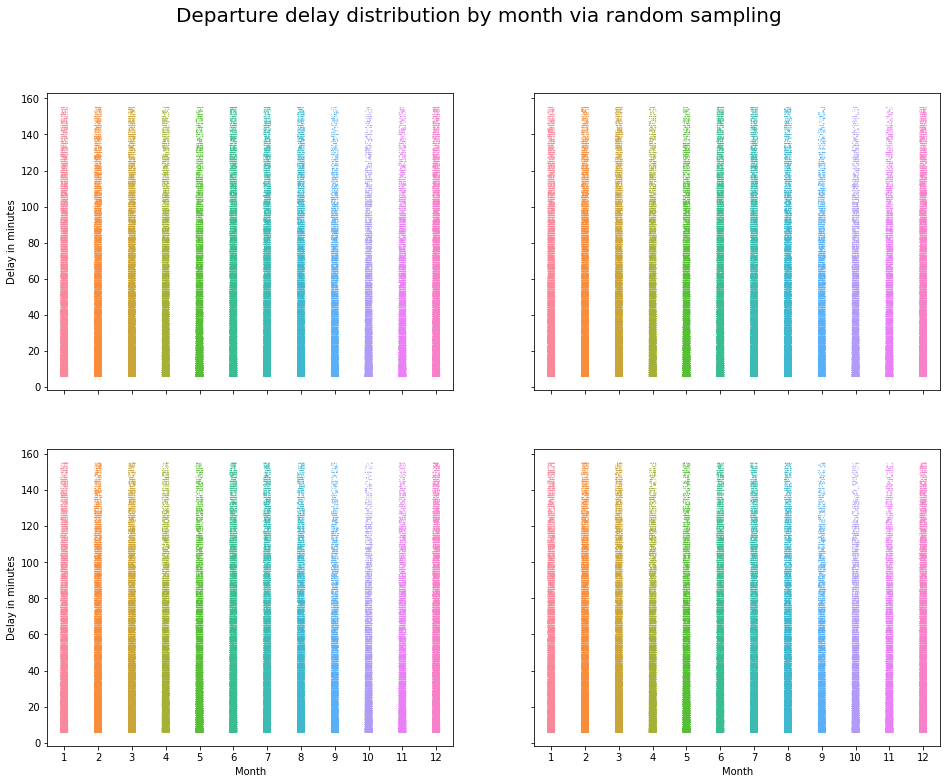

In [32]:
plt.rcParams["figure.figsize"] = [16.0, 12.0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
s1 = df.sample(frac=0.1, random_state=7)
s2 = df.sample(frac=0.1, random_state=29)
s3 = df.sample(frac=0.1, random_state=51)
s4 = df.sample(frac=0.1, random_state=97)
sns.stripplot(x='Month', y='DepDelay', data=s1, size=1, jitter=True, ax=ax1)
ax1.set(xlabel='', ylabel='Delay in minutes')
sns.stripplot(x='Month', y='DepDelay', data=s2, size=1, jitter=True, ax=ax2)
ax2.set(xlabel='', ylabel='')
sns.stripplot(x='Month', y='DepDelay', data=s3, size=1, jitter=True, ax=ax3)
ax3.set(ylabel='Delay in minutes')
sns.stripplot(x='Month', y='DepDelay', data=s4, size=1, jitter=True, ax=ax4)
ax4.set(ylabel='')
fig.suptitle('Departure delay distribution by month via random sampling', size=20)

The samplings show consistent behavior and are visually much more informative than plotting the entire set.

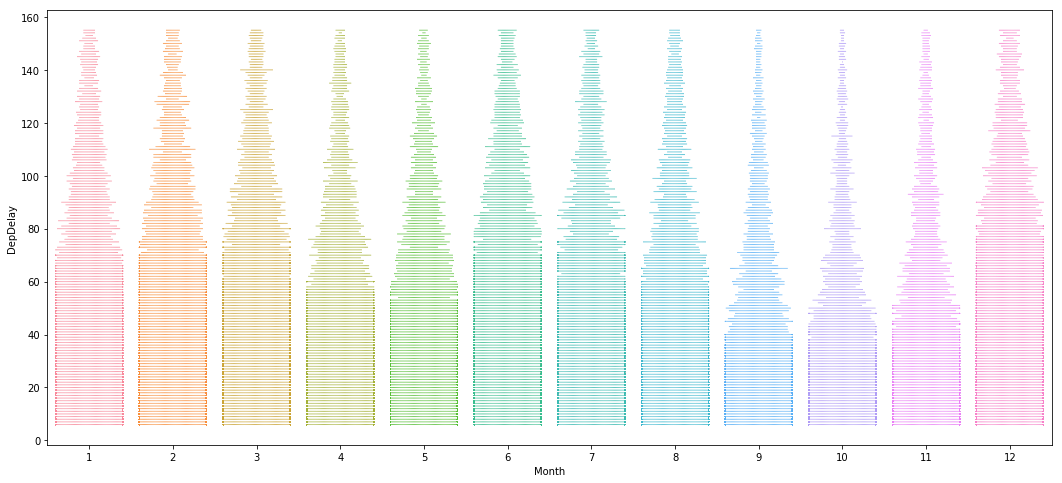

In [210]:
plt.rcParams["figure.figsize"] = [18.0, 8.0]
sns.swarmplot(x='Month', y='DepDelay', data=s1, size=1)
plt.title('Departure delay distribution by month')
plt.ylabel('Delay in minutes')

The swarm plot took an exceptionally long time to finish (20 minutes?), but does the best job of visualizing the distribution of the entire set.